# Konwolucyjne sieci neuronowe

(*ang. Convolutional Neural Network, CNN*)

Wróćmy do wyników z CIFAR10. Nie były wysokie. W jaki sposób możemy je poprawić?

In [ ]:
import itertools

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues
):
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
# Załadowanie rozszerzenia tensorboard
%load_ext tensorboard

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Dane treningowe: {len(x_train)} próbek")
print(f"Dane testowe: {len(x_test)} próbek")

170498071/170498071 [==============================] - 2s 0us/step
Dane treningowe: 50000 próbek
Dane testowe: 10000 próbek


In [ ]:
type(x_train[0])

numpy.ndarray

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


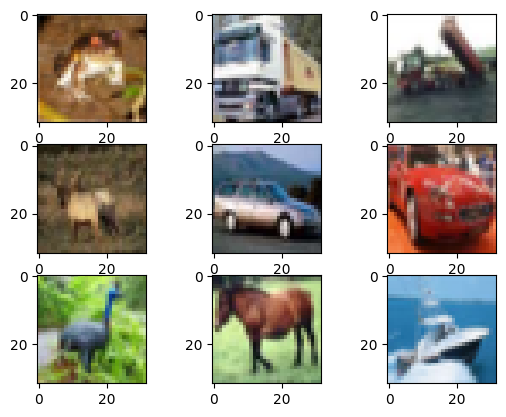

In [ ]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

# wyswietlmy pierwsze kilka ilustracji
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
n_classes = np.unique(y_train).size
n_classes

10

### Jako punkt odniesienia bierzemy MLP

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(n_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9788 - accuracy: 0.3095 - val_loss: 1.9091 - val_accuracy: 0.3281
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8858 - accuracy: 0.3504 - val_loss: 1.8713 - val_accuracy: 0.3592
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8558 - accuracy: 0.3628 - val_loss: 1.8798 - val_accuracy: 0.3660
Epoch 4/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8420 - accuracy: 0.3705 - val_loss: 1.9049 - val_accuracy: 0.3468
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8246 - accuracy: 0.3757 - val_loss: 1.8365 - val_accuracy: 0.3608
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8200 - accuracy: 0.3760 - val_loss: 1.9175 - val_accuracy: 0.3432
Epoch 7/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8193 - accuracy: 0.3792 - val_loss: 2.0394 - val_ac

[1.8863433599472046, 0.3506999909877777]

In [ ]:
model.predict(x_test)[:3].round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.04, 0.03, 0.1 , 0.48, 0.02, 0.06, 0.12, 0.  , 0.15, 0.  ],
       [0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.93],
       [0.38, 0.03, 0.01, 0.02, 0.  , 0.01, 0.  , 0.  , 0.28, 0.27]],
      dtype=float32)

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[556  13  47  32  23   2  13  37  26 251]
 [ 80 215  33  42  25   8  22  43  28 504]
 [143  13 287 115 169  11  63  74   6 119]
 [ 76  16 122 329  89  32  65  58  15 198]
 [ 77   4 150  94 372   4  66 103   6 124]
 [ 98  10 135 286 121  73  32  84  18 143]
 [ 25  10  83 187 184  12 309  50   6 134]
 [ 70  11  78  68  99  10  14 420   6 224]
 [288  14  26  46  15   7   5  11 180 408]
 [ 70  33  13  22  15   6  24  35  16 766]]


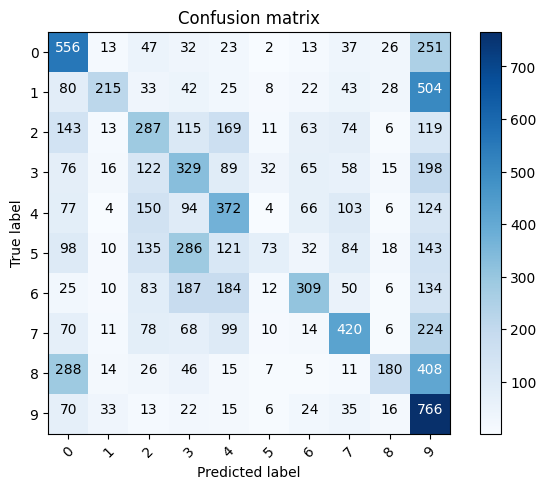

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

https://keras.io/api/datasets/cifar10/

* 0	airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck

Text(0.5, 1.0, 'True label: 5 Predicted: 4')

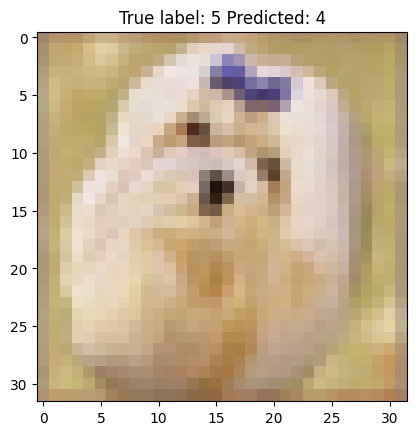

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Minimalna sieć konwolucyjna.

Liczba filtrów: 10, wielkość filtra: 3x3.

In [ ]:
?Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(10, 3, activation='relu', input_shape=(32,32,3)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(n_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 flatten_1 (Flatten)         (None, 9000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                90010     
                                                                 
Total params: 90,290
Trainable params: 90,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 10s 4ms/step - loss: 1.5770 - accuracy: 0.4452 - val_loss: 1.4211 - val_accuracy: 0.5024
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3123 - accuracy: 0.5422 - val_loss: 1.3376 - val_accuracy: 0.5349
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2306 - accuracy: 0.5710 - val_loss: 1.3484 - val_accuracy: 0.5289
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1759 - accuracy: 0.5875 - val_loss: 1.3512 - val_accuracy: 0.5373
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 1.3497 - accuracy: 0.5325


[1.3496607542037964, 0.5325000286102295]

In [ ]:
model.predict(x_test)[:3].round(2)

313/313 [==============================] - 1s 3ms/step


array([[0.  , 0.  , 0.08, 0.77, 0.02, 0.09, 0.02, 0.  , 0.02, 0.  ],
       [0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.01],
       [0.24, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.7 , 0.03]],
      dtype=float32)

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Padding "same".

In [ ]:
model = Sequential()
model.add(Conv2D(10, 3, activation='relu', padding="same", input_shape=(32,32,3)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(n_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 flatten_3 (Flatten)         (None, 10240)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                102410    
                                                                 
Total params: 102,690
Trainable params: 102,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5643 - accuracy: 0.4513 - val_loss: 1.3751 - val_accuracy: 0.5181
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2922 - accuracy: 0.5502 - val_loss: 1.3700 - val_accuracy: 0.5189
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2129 - accuracy: 0.5768 - val_loss: 1.3401 - val_accuracy: 0.5292
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1602 - accuracy: 0.5955 - val_loss: 1.3162 - val_accuracy: 0.5470
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1181 - accuracy: 0.6134 - val_loss: 1.3472 - val_accuracy: 0.5375
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0822 - accuracy: 0.6242 - val_loss: 1.3156 - val_accuracy: 0.5465
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0489 - accuracy: 0.6370 - val_loss: 1.2996 - val_ac

[1.3163082599639893, 0.5509999990463257]

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[621  19  44  28  13  16  14  13 170  62]
 [ 45 673   9  19   4   9  15  12  59 155]
 [ 89  13 415  73 113  99  91  45  38  24]
 [ 26  14 107 346  80 207 112  45  30  33]
 [ 37   6 127  90 455  64  99  86  23  13]
 [ 21   5  87 212  58 466  49  63  24  15]
 [ 14  16  65 107  76  37 632  19  14  20]
 [ 32   5  47  86  87  93  16 579   5  50]
 [104  76  10  10   6  16   9   4 726  39]
 [ 55 152  19  34  10  11  26  29  67 597]]


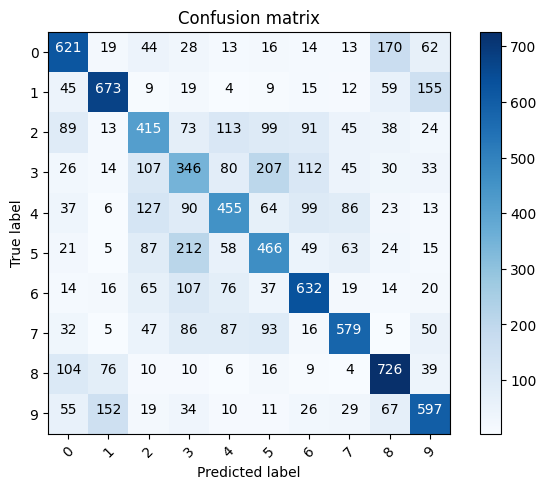

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 5 Predicted: 3')

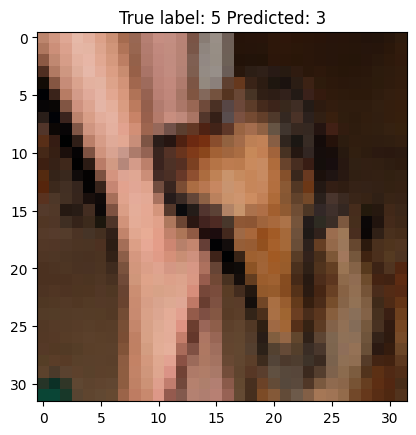

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Pooling

In [ ]:
?MaxPooling2D

In [ ]:
model = Sequential()
model.add(Conv2D(10, 3, activation='relu', padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(n_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 10)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 2560)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                25610     
                                                                 
Total params: 25,890
Trainable params: 25,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6252 - accuracy: 0.4306 - val_loss: 1.4833 - val_accuracy: 0.4777
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3419 - accuracy: 0.5298 - val_loss: 1.3249 - val_accuracy: 0.5424
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2574 - accuracy: 0.5599 - val_loss: 1.3099 - val_accuracy: 0.5451
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2064 - accuracy: 0.5818 - val_loss: 1.2520 - val_accuracy: 0.5705
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1664 - accuracy: 0.5929 - val_loss: 1.2368 - val_accuracy: 0.5707
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1355 - accuracy: 0.6036 - val_loss: 1.2149 - val_accuracy: 0.5778
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1065 - accuracy: 0.6138 - val_loss: 1.2162 - val_ac

[1.175674557685852, 0.60589998960495]

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[700  23  54   9  14   8  14  23 106  49]
 [ 43 674  20  10   6   7   9  12  67 152]
 [ 94   7 445  31 112  90  76 101  29  15]
 [ 32  12 110 292 107 179  99 107  32  30]
 [ 37   3 118  35 520  48  68 147  18   6]
 [ 17   6 124  90  57 453  35 183  19  16]
 [ 12   5  62  42  69  21 726  36  13  14]
 [ 21   4  33  21  39  57  12 784  10  19]
 [109  50  15   4   3  10   7  13 749  40]
 [ 52  83  12   9   6   8   8  50  56 716]]


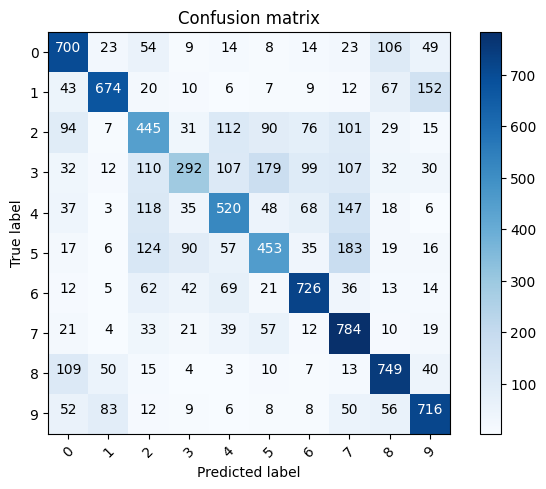

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Zadanie 5

Dodaj ukrytą warstwę gęstą miedzy częścią konwoucyjną sieci a warstwą wyjściową i regularyzację dropout 20% w po warstwie łączącej i po warstwie gęstej.

In [ ]:
model = Sequential()
model.add(Conv2D(10, 3, activation='relu', padding="same", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten(input_shape=(32, 32, 3)))

model.add(Dense(n_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 10)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 10)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 10)        0         
                                                                 
 flatten_5 (Flatten)         (None, 2560)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                81952     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 8s 5ms/step - loss: 1.8574 - accuracy: 0.3156 - val_loss: 1.5813 - val_accuracy: 0.4414
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5937 - accuracy: 0.4164 - val_loss: 1.4238 - val_accuracy: 0.5076
Epoch 3/100
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5083 - accuracy: 0.4419 - val_loss: 1.3750 - val_accuracy: 0.5142
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4537 - accuracy: 0.4656 - val_loss: 1.3339 - val_accuracy: 0.5312
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4221 - accuracy: 0.4758 - val_loss: 1.3335 - val_accuracy: 0.5332
Epoch 6/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3957 - accuracy: 0.4886 - val_loss: 1.2883 - val_accuracy: 0.5493
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3752 - accuracy: 0.4925 - val_loss: 1.2754 - val_ac

[1.1721686124801636, 0.5821999907493591]

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[615  27  80  25  10   6   5  16 167  49]
 [ 31 742  11   5   5   4  13  17  66 106]
 [ 75  11 497  42 103 101  41  66  43  21]
 [ 21  17  92 375  76 216  49  90  38  26]
 [ 27   7 219  80 421  43  50 125  21   7]
 [ 11  10  95 156  46 515  16 110  28  13]
 [ 12  17  99 102  97  24 589  37  14   9]
 [ 16   8  33  48  59  95   8 700  13  20]
 [ 84  62  19  16   5   9   3   8 758  36]
 [ 42 176  11  16  15   5  11  33  81 610]]


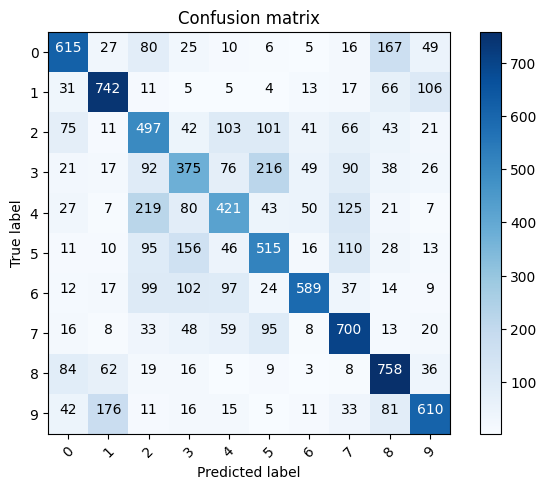

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 3 Predicted: 7')

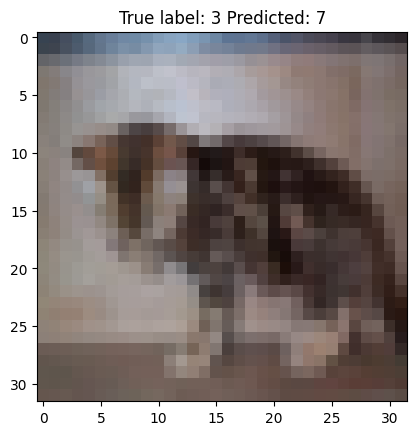

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Zadanie 6

Zbuduj sieć konwolucyjną złożoną z:
* dwóch warstw konwolucyjnych o 16 filtrach 3x3
* warstwy łączącącej i warstwy regularyzującej dropout po każdej warstwie konwolucyjnej
* warstwy gęsteh o 32 neuronach  z warstwą regularyzującą dropout
* warstwy wyjściowej

In [ ]:
model = Sequential()


model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 16)         

In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7701 - accuracy: 0.3498 - val_loss: 1.5267 - val_accuracy: 0.4527
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5107 - accuracy: 0.4514 - val_loss: 1.3691 - val_accuracy: 0.5153
Epoch 3/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4159 - accuracy: 0.4873 - val_loss: 1.2680 - val_accuracy: 0.5621
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3573 - accuracy: 0.5096 - val_loss: 1.2409 - val_accuracy: 0.5642
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3114 - accuracy: 0.5256 - val_loss: 1.1745 - val_accuracy: 0.5878
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2797 - accuracy: 0.5390 - val_loss: 1.1510 - val_accuracy: 0.5992
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2550 - accuracy: 0.5451 - val_loss: 1.1228 - val_ac

[0.9931104779243469, 0.6478999853134155]

In [ ]:
?BatchNormalization

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(x_train,y_train,validation_split=0.20,
          epochs=100,
          callbacks=[early_stopping])

model.evaluate(x_test,y_test)

Epoch 1/100
1250/1250 [==============================] - 20s 11ms/step - loss: 1.6630 - accuracy: 0.4254 - val_loss: 1.2560 - val_accuracy: 0.5545
Epoch 2/100
1250/1250 [==============================] - 13s 11ms/step - loss: 1.1482 - accuracy: 0.5951 - val_loss: 0.8627 - val_accuracy: 0.6925
Epoch 3/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9636 - accuracy: 0.6618 - val_loss: 0.7765 - val_accuracy: 0.7193
Epoch 4/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8538 - accuracy: 0.7062 - val_loss: 0.7659 - val_accuracy: 0.7309
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7762 - accuracy: 0.7319 - val_loss: 0.6472 - val_accuracy: 0.7745
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7226 - accuracy: 0.7508 - val_loss: 0.6424 - val_accuracy: 0.7741
Epoch 7/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6671 - accuracy: 0.7699 - val_loss: 0.58

[0.5494645237922668, 0.8123000264167786]

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[763  19  51  54  11   4   6   6  60  26]
 [  6 928   0   5   5   2   4   0  13  37]
 [ 33   2 733  52  68  47  50   7   6   2]
 [  9   5  57 711  39 123  46   2   5   3]
 [  6   1  59  57 793  34  37  11   2   0]
 [  3   1  33 127  35 780   8  10   2   1]
 [  6   2  22  47  18  14 883   3   4   1]
 [  7   1  29  59  88  80   2 729   2   3]
 [ 21  12   9  29   1   4   4   0 909  11]
 [ 10  45   3  13   4   3   6   2  20 894]]


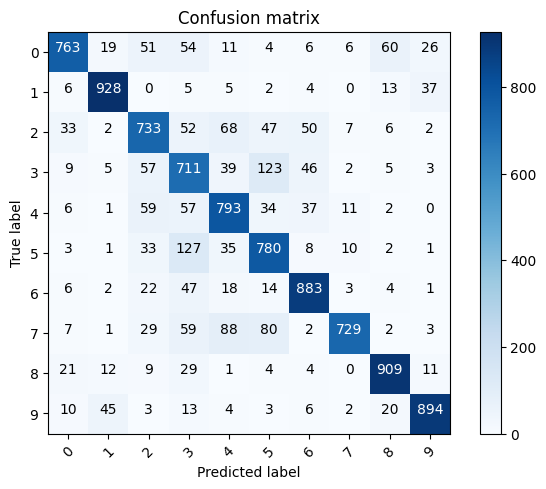

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted: 6')

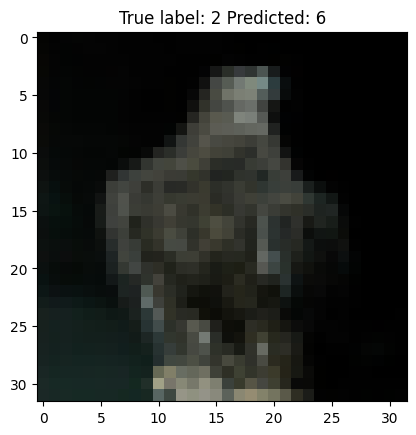

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

In [ ]:
model.compile(
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',  # funkcja strat 
    metrics=['accuracy']  # metryki
)

In [ ]:
r = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=30,
)

Epoch 1/30
1563/1563 [==============================] - 8s 4ms/step - loss: 1.1118 - accuracy: 0.6021 - val_loss: 0.9597 - val_accuracy: 0.6627
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0955 - accuracy: 0.6081 - val_loss: 1.0010 - val_accuracy: 0.6454
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0864 - accuracy: 0.6118 - val_loss: 0.9818 - val_accuracy: 0.6530
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0900 - accuracy: 0.6103 - val_loss: 0.9862 - val_accuracy: 0.6520
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0737 - accuracy: 0.6162 - val_loss: 1.0056 - val_accuracy: 0.6489
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0748 - accuracy: 0.6129 - val_loss: 1.0117 - val_accuracy: 0.6477
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0751 - accuracy: 0.6129 - val_loss: 0.9846 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test.flatten())[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test.flatten()[i]} Predicted: {p_test[i]}")

### Zadanie 7

Zbuduj sieć przedstawioną na rysunku

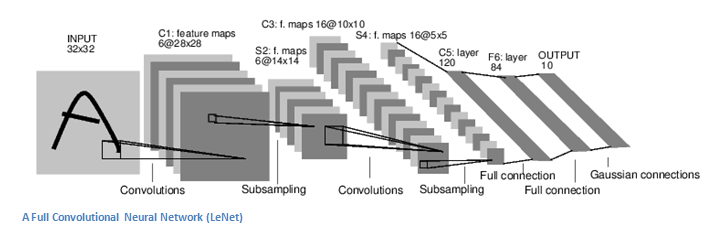

Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Zadanie 7

Stwórz sieć (konwolucyjną), która klasyfikować będzie zdjęcia ubrań na podstawie zbioru Fashion MNIST (https://keras.io/api/datasets/fashion_mnist/).

Pamiętaj, by w dodać GPU w ustawieniach środowiska wykonawczego

Do zbadania:


*   Optymalna ilość warstw, jak wpływają na działanie warstwy DropOut i BatchNormalization?
*   Rodzaje filtrów
*   Hiperparametry dotyczące uczenia sieci
*   Optymalna ilość epok
*   Wybór funkcji optymalizującej
*   Sposób inicjalizacji wag
